In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"kunakavya","key":"64a36e4e34c59fc199fb97742d7bdce8"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

gtsrb-german-traffic-sign.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
file_name="gtsrb-german-traffic-sign.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


# importing the required Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import os

# Reading the input images and putting them into a numpy array

In [ ]:
data=[]
labels=[]
 
height = 30
width = 30
channels = 3
classes = 43
n_inputs = height * width*channels
 
for i in range(classes) :
    path = "train/{0}/".format(i)
    print(path)
    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            prin havet(" ")
               
Cells=np.array(data)
labels=np.array(labels)
 
#Randomize the order of the input images
s=np.arange(Cells.shape[0])
np.random.seed(43)
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

train/0/
train/1/
train/2/
train/3/
train/4/
train/5/
train/6/
train/7/
train/8/
train/9/
train/10/
train/11/
train/12/
train/13/
train/14/
train/15/
train/16/
train/17/
train/18/
train/19/
train/20/
train/21/
train/22/
train/23/
train/24/
train/25/
train/26/
train/27/
train/28/
train/29/
train/30/
train/31/
train/32/
train/33/
train/34/
train/35/
train/36/
train/37/
train/38/
train/39/
train/40/
train/41/
train/42/


# Displaying images with labels

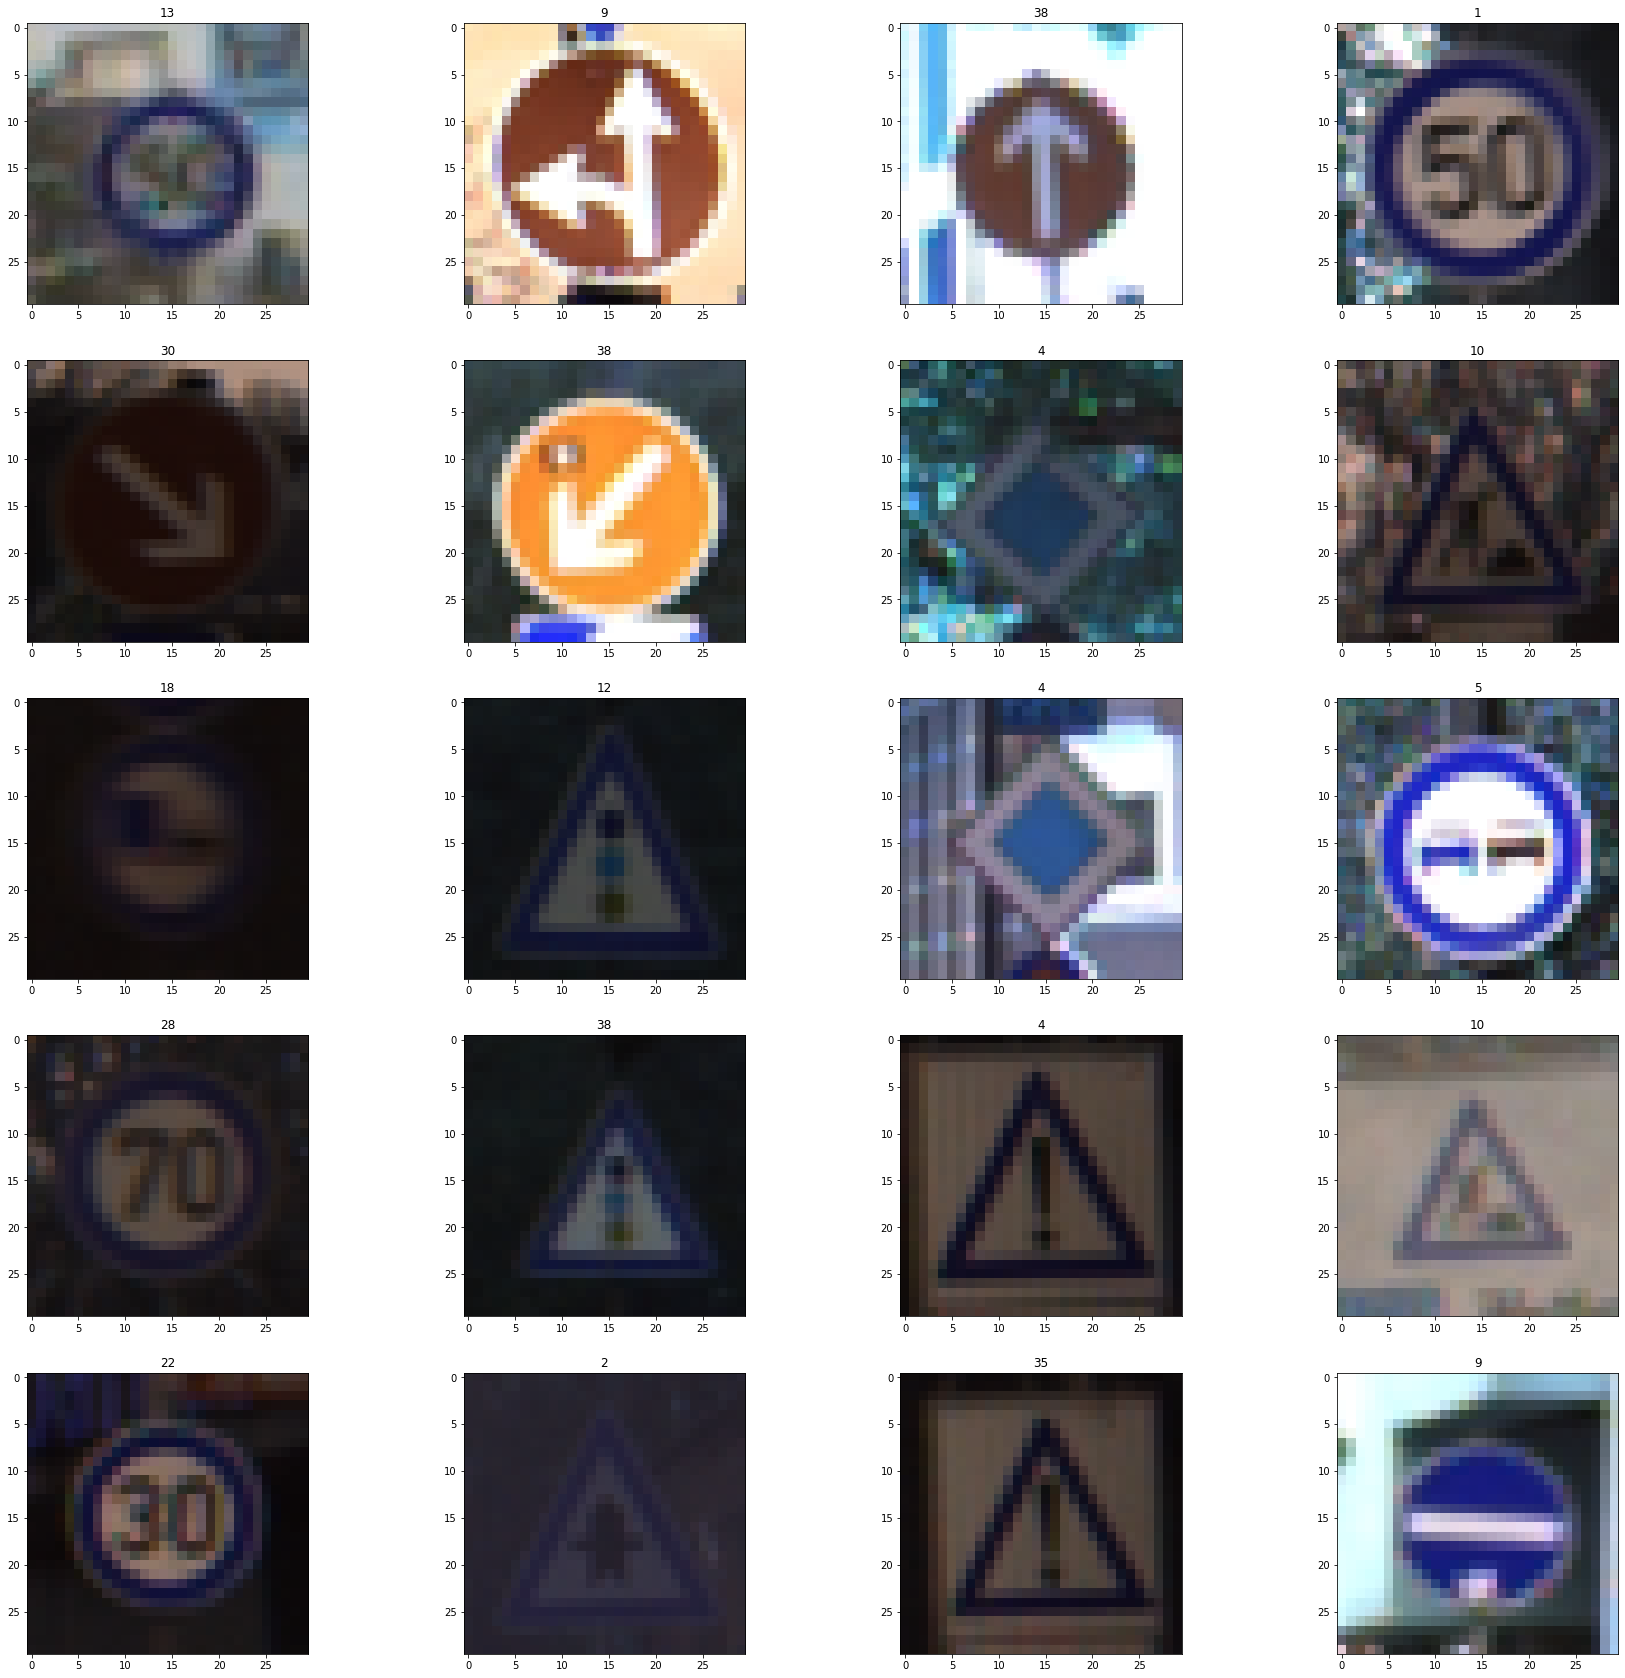

In [ ]:
fig, ax = plt.subplots(5,4,figsize=(30,30))
for i in range(5):
    for j in range(4):
        l = np.random.randint(0,len(data))
        ax[i,j].imshow(data[l])
        ax[i,j].set_title(labels[l])

# Spliting the images into train and validation sets

In [ ]:
(X_train,X_val)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]
X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255
(y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

from keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

# defining model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))


In [ ]:
#Compilation of the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 5, 5, 64)         

Train on 31368 samples, validate on 7841 samples
Epoch 1/10
31368/31368 [==============================] - 114s 4ms/step - loss: 1.2112 - accuracy: 0.6559 - val_loss: 0.1482 - val_accuracy: 0.9582
Epoch 2/10
31368/31368 [==============================] - 114s 4ms/step - loss: 0.2358 - accuracy: 0.9276 - val_loss: 0.0602 - val_accuracy: 0.9839
Epoch 3/10
31368/31368 [==============================] - 113s 4ms/step - loss: 0.1443 - accuracy: 0.9565 - val_loss: 0.0365 - val_accuracy: 0.9922
Epoch 4/10
31368/31368 [==============================] - 114s 4ms/step - loss: 0.0998 - accuracy: 0.9694 - val_loss: 0.0337 - val_accuracy: 0.9931
Epoch 5/10
31368/31368 [==============================] - 115s 4ms/step - loss: 0.0797 - accuracy: 0.9747 - val_loss: 0.0245 - val_accuracy: 0.9941
Epoch 6/10
31368/31368 [==============================] - 113s 4ms/step - loss: 0.0639 - accuracy: 0.9790 - val_loss: 0.0199 - val_accuracy: 0.9954
Epoch 7/10
31368/31368 [==============================] - 114s 

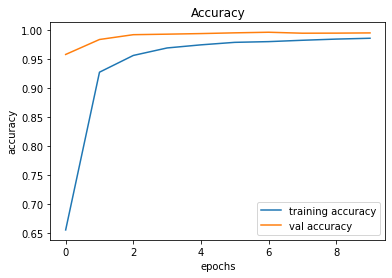

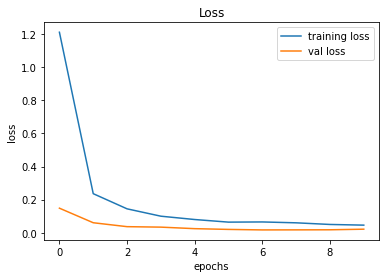

In [ ]:
epochs = 10
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,
validation_data=(X_val, y_val))

#Display of the accuracy and the loss values
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [ ]:
#Predicting with the test data
y_test=pd.read_csv("Test.csv")
labels=y_test['Path'].to_numpy()
y_test=y_test['ClassId'].values

data=[]

for f in labels:
    image=cv2.imread('test/'+f.replace('Test/', ''))
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

X_test=np.array(data)
X_test = X_test.astype('float32')/255 
pred = model.predict_classes(X_test)

In [ ]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.96270783847981